# Priya More

## Graduate Rotational Internship Program 

# Task # 4 - To Explore Decision Tree Algorithm 


# Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt,pydotplus
from sklearn import datasets
from sklearn import tree, metrics,model_selection ,preprocessing
from IPython.display import Image, display
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import export_graphviz
from IPython.display import Image  
#from sklearn.externals.six import StringIO

In [2]:
df=pd.read_csv("iris.csv")
df['species_label'], _ =pd.factorize(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,species_label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [3]:
df.shape

(150, 7)

In [4]:
# select Features
y =df['species_label']
x= df[['PetalLengthCm', 'PetalWidthCm']]

In [5]:
x_train , x_test , y_train , y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)

# Train the model and make prediction

In [6]:
#Train the decision tree
dtree= tree.DecisionTreeClassifier(criterion ='entropy' ,max_depth =3 , random_state=0)  #if data= homogenius = entropy = 0
                                                                                         # if data= hetrogenius = entropy =1   # the range pf entropy is always  0 to 1
dtree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [7]:
y_train

60     1
116    2
144    2
119    2
108    2
      ..
9      0
103    2
67     1
117    2
47     0
Name: species_label, Length: 105, dtype: int64

In [8]:
y_pred=dtree.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

# Evalute the models performans

In [9]:
#how  did our model Perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified sample : {}'.format(count_misclassified))
accuracy=metrics.accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified sample : 1
Accuracy: 0.98


<ipython-input-10-a13d231cc870>:8: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='Upper left')


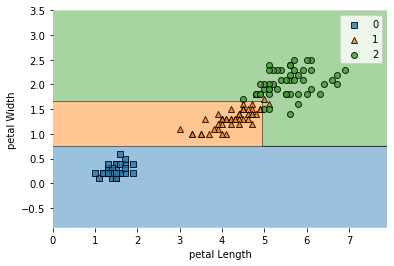

In [10]:
#Visulize the models decision regions to see how it separates the samples

x_combined = np.vstack((x_train,x_test))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=x_combined , y=y_combined ,clf=dtree)  # X will always capital 
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.legend(loc='Upper left')
plt.show()

C:\Users\Pratik\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:316: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  ax.scatter(x_data,
<ipython-input-11-3310029636b8>:5: MatplotlibDeprecationWarning: Unrecognized location 'Upper left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='Upper left')


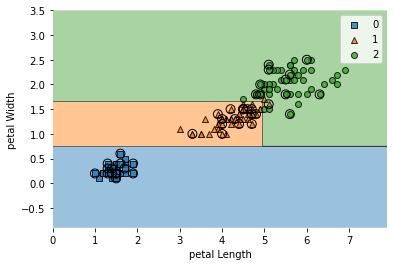

In [11]:
x=np.array((x_test))
plot_decision_regions(X=x_combined , y=y_combined ,clf=dtree, X_highlight=x)
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.legend(loc='Upper left')
plt.show()

In [12]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\graphviz-2.42.1/bin/'

In [13]:
import sys

sys.path.append('C:/Users/Pratik/anaconda3/Library/bin/graphviz')

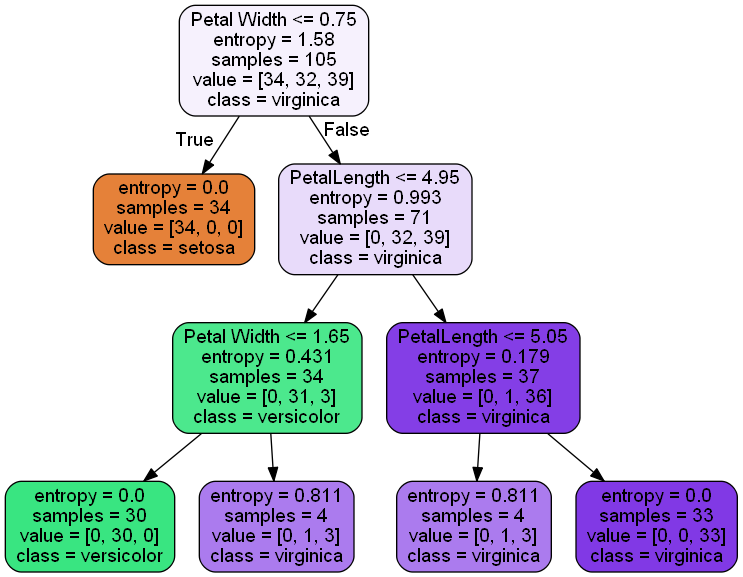

In [14]:
dot_data=tree.export_graphviz(dtree, out_file=None,filled=True,rounded=True, 
                              feature_names=['PetalLength' ,'Petal Width'],
                              class_names=['setosa','versicolor','virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))